In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# -------------------------------------------------
# 1. DEFINE A MARKOV CHAIN TRANSITION MATRIX
# -------------------------------------------------
# Weather example: Sunny (S) and Rainy (R)
P = np.array([
    [0.8, 0.2],   # From Sunny → (Sunny, Rainy)
    [0.4, 0.6]    # From Rainy → (Sunny, Rainy)
])

states = ["Sunny", "Rainy"]

# Initial distribution (start 100% Sunny)
v0 = np.array([1.0, 0.0])

In [4]:
# -------------------------------------------------
# 2. SIMULATE THE MARKOV CHAIN OVER TIME
# -------------------------------------------------
def simulate_markov(initial_state, P, steps=30):
    state = initial_state
    history = [state]

    for _ in range(steps):
        state = np.random.choice(len(P), p=P[state])
        history.append(state)

    return history

trajectory = simulate_markov(initial_state=0, P=P, steps=50)

In [17]:
# -------------------------------------------------
# 3. COMPUTE STATE DISTRIBUTION OVER TIME
# -------------------------------------------------
distributions = [v0]
v = v0.copy()
for i in range(100):
    v = v @ P
    distributions.append(v.copy())
distributions = np.array(distributions)

In [18]:
# -------------------------------------------------
# 4. COMPUTE STEADY STATE USING EIGENVECTORS
# -------------------------------------------------
eigenvalues, eigenvectors = np.linalg.eig(P.T)
idx = np.argmax(np.real(eigenvalues))
steady = np.real(eigenvectors[:, idx])
steady = steady / steady.sum()  # Normalize

print("Eigenvalues:\n", eigenvalues)
print("\nSteady state (Eigenvector for λ=1):")
print(steady)

Eigenvalues:
 [1.  0.4]

Steady state (Eigenvector for λ=1):
[0.66666667 0.33333333]


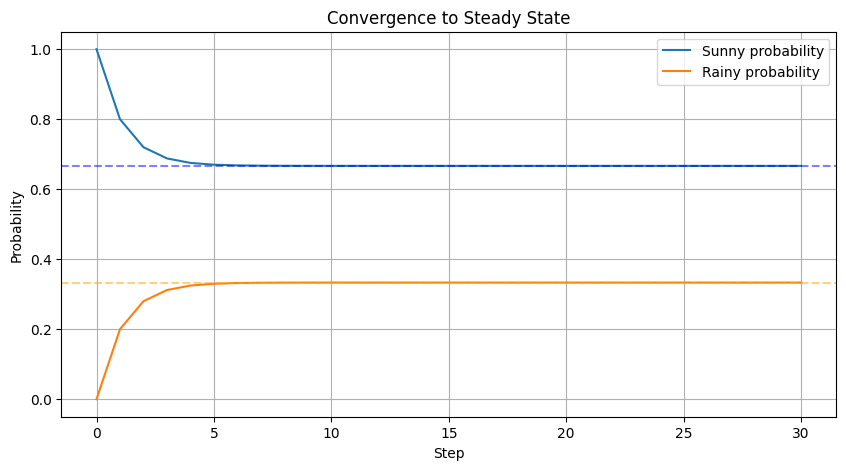

In [7]:
# -------------------------------------------------
# 5. VISUALIZATIONS
# -------------------------------------------------

# ----- (A) State distribution convergence -----
plt.figure(figsize=(10, 5))
plt.plot(distributions[:, 0], label="Sunny probability")
plt.plot(distributions[:, 1], label="Rainy probability")
plt.axhline(steady[0], color='blue', linestyle='--', alpha=0.5)
plt.axhline(steady[1], color='orange', linestyle='--', alpha=0.5)
plt.title("Convergence to Steady State")
plt.xlabel("Step")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

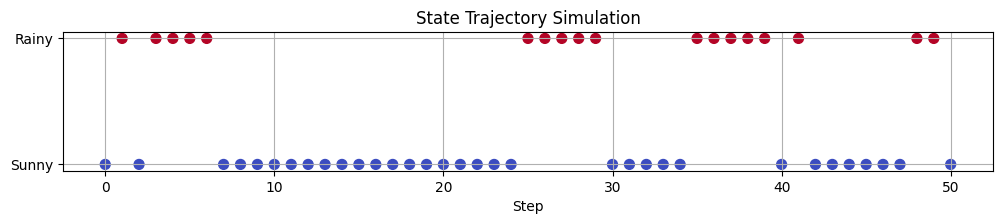

In [8]:
# ----- (B) Trajectory of a random simulation -----
plt.figure(figsize=(12, 1.8))
plt.scatter(range(len(trajectory)), trajectory, c=trajectory, cmap="coolwarm", s=50)
plt.title("State Trajectory Simulation")
plt.yticks([0, 1], ["Sunny", "Rainy"])
plt.xlabel("Step")
plt.grid(True)
plt.show()

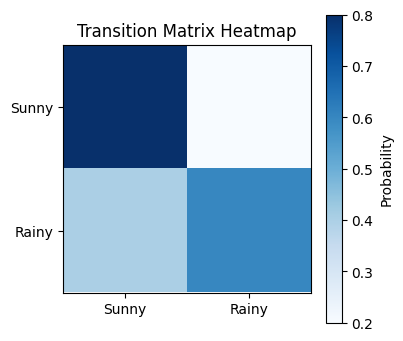

In [9]:
# ----- (C) Transition Matrix Heat Map -----
plt.figure(figsize=(4, 4))
plt.imshow(P, cmap="Blues")
plt.colorbar(label="Probability")
plt.title("Transition Matrix Heatmap")
plt.xticks(range(len(states)), states)
plt.yticks(range(len(states)), states)
plt.show()